In [39]:
# 1. Imports
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [40]:
# 2. Load dataset using ImageDataGenerator
train_dir = 'train'
batch_size = 32
img_size = (128, 128)

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())

Found 8008 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [41]:
# 3. Define a custom CNN (like Lab 5 style)
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\darkb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# 4. Train the custom CNN
history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)

c:\Users\darkb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 79s 311ms/step - accuracy: 0.1166 - loss: 2.2922 - val_accuracy: 0.1565 - val_loss: 2.2431
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 93s 370ms/step - accuracy: 0.1998 - loss: 2.1820 - val_accuracy: 0.2045 - val_loss: 2.1511
Epoch 3/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 373ms/step - accuracy: 0.2243 - loss: 2.1180 - val_accuracy: 0.2545 - val_loss: 2.0474
Epoch 4/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 89s 353ms/step - accuracy: 0.2694 - loss: 2.0421 - val_accuracy: 0.2535 - val_loss: 2.0665
Epoch 5/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 0.2946 - loss: 1.9997 - val_accuracy: 0.2900 - val_loss: 1.9936
Epoch 6/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 69s 274ms/step - accuracy: 0.3163 - loss: 1.9433 - val_accuracy: 0.3155 - val_loss: 1.9382
Epoch 7/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 93s 369ms/step - accuracy: 0.3466 - loss: 1.8938 - val_accuracy: 0.3065 - val_loss: 1.9448
Epoch 8/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 152s 407ms/step - accuracy: 0.3527 - loss:

In [43]:
# 5.1. Define a transfer learning model (like Lab 6 style)
base_model = keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base

model_tl = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(class_names), activation='softmax')
])

model_tl.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# 5.2 Define a different transfer learning model (using VGG16 instread of MobileNetV2)
base_model2 = keras.applications.VGG16(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model2.trainable = False  # Freeze base

model_tl2 = models.Sequential([
    base_model2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(class_names), activation='softmax')
])

model_tl2.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# 6.1. Train the transfer learning model
history_tl = model_tl.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 104s 400ms/step - accuracy: 0.4384 - loss: 1.7400 - val_accuracy: 0.5900 - val_loss: 1.2138
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 130s 354ms/step - accuracy: 0.5950 - loss: 1.1850 - val_accuracy: 0.6180 - val_loss: 1.1465
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 149s 383ms/step - accuracy: 0.6285 - loss: 1.0911 - val_accuracy: 0.6135 - val_loss: 1.1535
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 91s 362ms/step - accuracy: 0.6541 - loss: 1.0074 - val_accuracy: 0.6205 - val_loss: 1.1240
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 80s 320ms/step - accuracy: 0.6704 - loss: 0.9610 - val_accuracy: 0.6135 - val_loss: 1.1767
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 100s 393ms/step - accuracy: 0.6921 - loss: 0.8939 - val_accuracy: 0.6320 - val_loss: 1.1261
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 124s 320ms/step - accuracy: 0.7010 - loss: 0.8716 - val_accuracy: 0.6195 - val_loss: 1.2055
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 73s 290ms/step - accuracy: 0.7177 - lo

In [51]:
# 6.2. Train the different transfer learning model
history_tl2 = model_tl2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 484s 2s/step - accuracy: 0.1183 - loss: 2.2964 - val_accuracy: 0.1720 - val_loss: 2.2165
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.1562 - loss: 2.2311 - val_accuracy: 0.1700 - val_loss: 2.2498
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.1614 - loss: 2.2221 - val_accuracy: 0.1790 - val_loss: 2.2355
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.1684 - loss: 2.2231 - val_accuracy: 0.1710 - val_loss: 2.1880
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.1721 - loss: 2.1840 - val_accuracy: 0.1845 - val_loss: 2.1712
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 27390s 110s/step - accuracy: 0.2059 - loss: 2.1630 - val_accuracy: 0.1755 - val_loss: 2.1973
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.1973 - loss: 2.1544 - val_accuracy: 0.2085 - val_loss: 2.1221
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.2138 - loss: 2.1378 - val_

In [47]:
# 7. Define evaluation function: Top-1 and Average Accuracy per Class
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
    avg_class_accuracy = np.mean(class_accuracy)
    top1_accuracy = np.mean(y_true == y_pred_classes)
    
    print(f"Top-1 Accuracy: {(top1_accuracy*100):.2f}%")
    print(f"Average Accuracy per Class: {(avg_class_accuracy*100):.2f}%")
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    return top1_accuracy, avg_class_accuracy, cm

Custom CNN Evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step
Top-1 Accuracy: 36.80%
Average Accuracy per Class: 36.81%


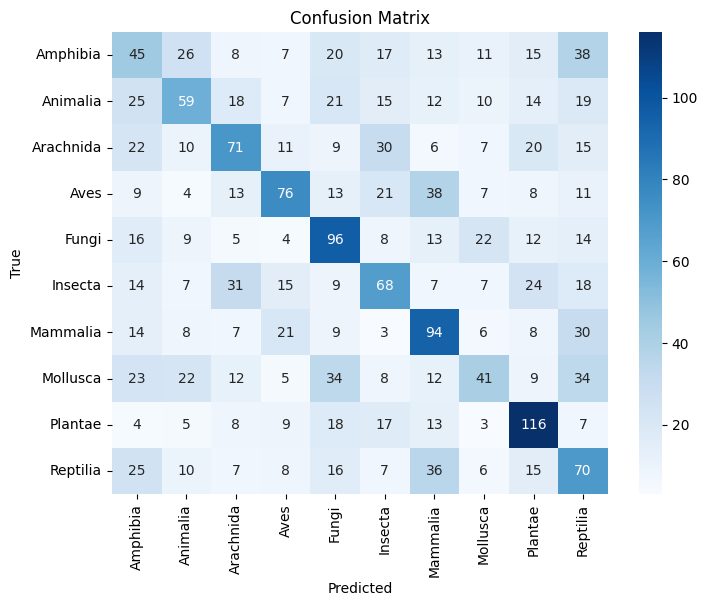

Transfer Learning Model Evaluation 1:
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step
Top-1 Accuracy: 62.55%
Average Accuracy per Class: 62.56%


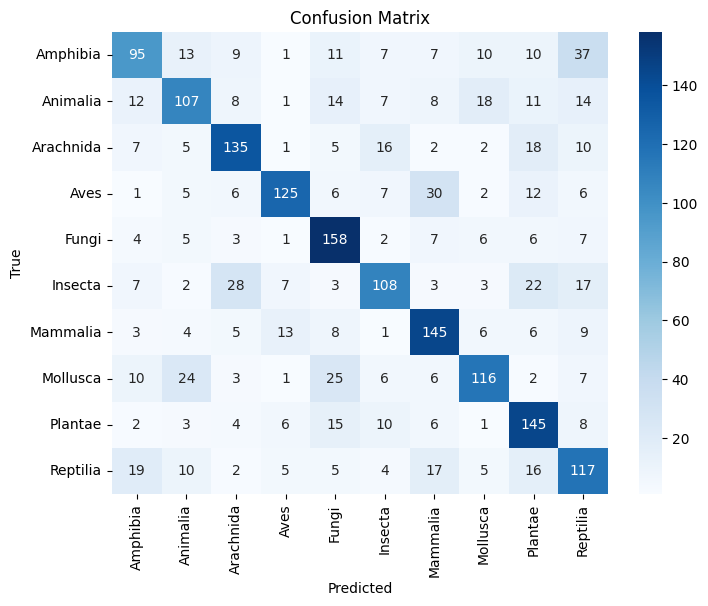

Transfer Learning Model Evaluation 2:
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step
Top-1 Accuracy: 45.95%
Average Accuracy per Class: 45.95%


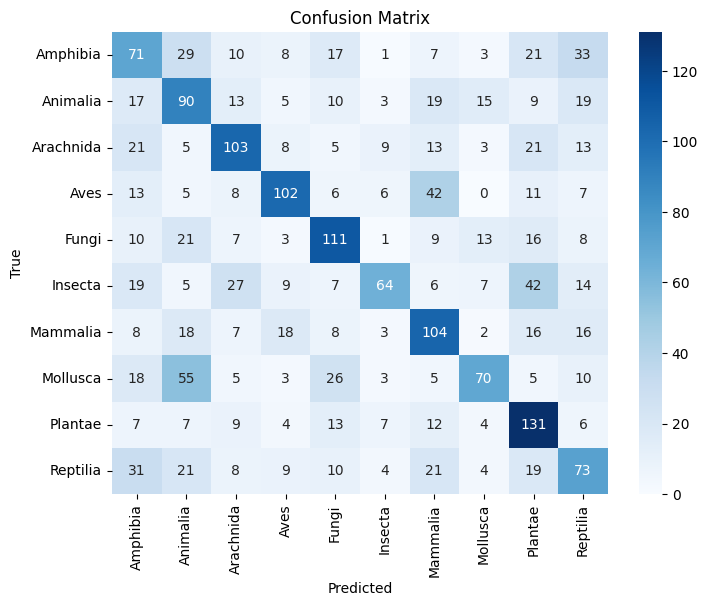

(0.4595,
 0.4595226755668892,
 array([[ 71,  29,  10,   8,  17,   1,   7,   3,  21,  33],
        [ 17,  90,  13,   5,  10,   3,  19,  15,   9,  19],
        [ 21,   5, 103,   8,   5,   9,  13,   3,  21,  13],
        [ 13,   5,   8, 102,   6,   6,  42,   0,  11,   7],
        [ 10,  21,   7,   3, 111,   1,   9,  13,  16,   8],
        [ 19,   5,  27,   9,   7,  64,   6,   7,  42,  14],
        [  8,  18,   7,  18,   8,   3, 104,   2,  16,  16],
        [ 18,  55,   5,   3,  26,   3,   5,  70,   5,  10],
        [  7,   7,   9,   4,  13,   7,  12,   4, 131,   6],
        [ 31,  21,   8,   9,  10,   4,  21,   4,  19,  73]], dtype=int64))

In [48]:
# 8. Evaluate all of the models
print("Custom CNN Evaluation:")
evaluate_model(model_cnn, val_generator)

print("Transfer Learning Model Evaluation 1:")
evaluate_model(model_tl, val_generator)

print("Transfer Learning Model Evaluation 2:")
evaluate_model(model_tl2, val_generator)